In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
#Reading the data and storing it in a variable  
netflix = pd.read_csv('Netflix Dataset.csv')
netflix


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [28]:
#Information about the data
netflix.head()#first 5 rows of the dataset
netflix.shape#shape of the dataset
netflix.tail()#last 5 rows of the dataset
netflix.columns
netflix.info()#information about the dataset
netflix.describe()#statistical information about the dataset



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s684,Movie,Backfire,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,118,2865,1608,334,3


In [29]:
netflix.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [38]:
# Data Cleaning
netflix['Director'] = netflix['Director'].fillna('Unknown')
netflix['Cast'] = netflix['Cast'].fillna('Unknown')
netflix['Country'] = netflix['Country'].fillna('Unknown')
netflix.dropna(subset=['Rating'],inplace=True)
netflix['Release_Date'] = pd.to_datetime(netflix['Release_Date'], errors='coerce')
netflix.dropna(subset=['Release_Date'],inplace=True)
netflix['Release_Year'] = netflix['Release_Date'].dt.year


netflix.head(10)#displaying the first 5 rows of the cleaned dataset
netflix.shape#shape of the cleaned dataset



(7684, 12)

In [39]:
netflix.isnull().sum()

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
Release_Year    0
dtype: int64

In [37]:
#Rectified inconsistencies 
netflix['Show_Id']=netflix['Show_Id'].str.strip().str.lower()
netflix['Category']=netflix['Category'].str.strip().str.title()
netflix['Title']=netflix['Title'].str.strip().str.title()
netflix['Director']=netflix['Director'].str.strip().str.title() 
netflix['Cast']=netflix['Cast'].str.strip().str.title()
netflix['Country']=netflix['Country'].str.strip().str.title()
netflix['Rating']=netflix['Rating'].str.strip().str.upper()
netflix['Type']=netflix['Type'].str.strip().str.title()
netflix['Description']=netflix['Description'].str.strip().str.title()
netflix.tail(10)



,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year
7779,s7778,Tv Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,TV-Y7,2 Seasons,"Kids' Tv, Korean Tv Shows, Tv Comedies","While Living Alone In A Spooky Town, A Young G...",2019
7780,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,R,88 min,"Comedies, Horror Movies",Looking To Survive In A World Taken Over By Zo...,2019
7781,s7780,Tv Show,Zona Rosa,Unknown,"Manu Nna, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,2019-11-26,TV-MA,1 Season,"International Tv Shows, Spanish-Language Tv Sh...",An Assortment Of Talent Takes The Stage For A ...,2019
7782,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,2018-07-01,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A Drug Dealer Starts Having Doubts About His T...,2018
7783,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,PG,88 min,"Children & Family Movies, Comedies","Dragged From Civilian Life, A Former Superhero...",2020
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,TV-MA,99 min,"Dramas, International Movies",When Lebanon'S Civil War Deprives Zozo Of His ...,2020
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A Scrappy But Poor Boy Worms His Way Into A Ty...,2019
7786,s7785,Movie,Zulu Man In Japan,Unknown,Nasty C,Unknown,2020-09-25,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In This Documentary, South African Rapper Nast...",2020
7787,s7786,Tv Show,Zumbo'S Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,TV-PG,1 Season,"International Tv Shows, Reality Tv",Dessert Wizard Adriano Zumbo Looks For The Nex...,2020
7788,s7787,Movie,Zz Top: That Little Ol' Band From Texas,Sam Dunn,Unknown,"United Kingdom, Canada, United States",2020-03-01,TV-MA,90 min,"Documentaries, Music & Musicals",This Documentary Delves Into The Mystique Behi...,2020


In [ ]:
#unique values in the columns
print(netflix.Show_Id.unique())#unique values in the Show_Id column
print()
print(netflix.Type.unique())#unique values in the Type column
print()
print(netflix.Title.unique())#unique values in the Title column
print()
print(netflix.Director.unique())#unique values in the Director column
print()
print(netflix.Cast.unique())#unique values in the Cast column  
print()
print(netflix.Country.unique())#unique values in the Country column
print()
print(netflix.Release_Date.unique())#unique values in the Release_Date column
print()
print(netflix.Rating.unique())#unique values in the Rating column
print()
print(netflix.Duration.unique())#unique values in the Duration column
print()
print(netflix.Description.unique())#unique values in the Description column
print()
print(netflix.Release_Year.unique())#unique values in the Release_Year column
print()
print(netflix.Category.unique())#unique values in the Category column




['s1' 's2' 's3' ... 's7785' 's7786' 's7787']

['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'
 'Dramas, International Movies' 'Horror Movies, International Movies'
 'Action & Adventure, Independent Movies, Sci-Fi & Fantasy' 'Dramas'
 'International TV Shows, TV Dramas, TV Mysteries'
 'Horror Movies, International Movies, Thrillers' 'Dramas, Thrillers'
 'Crime TV Shows, International TV Shows, TV Dramas'
 'Crime TV Shows, Docuseries, International TV Shows'
 'Documentaries, International Movies, Sports Movies'
 'Independent Movies, Sci-Fi & Fantasy, Thrillers'
 'Dramas, International Movies, Thrillers'
 'International TV Shows, TV Dramas'
 'Comedies, Dramas, Independent Movies' 'Sports Movies'
 'Dramas, Independent Movies, International Movies'
 'Action & Adventure, Dramas, International Movies'
 'Anime Series, International TV Shows' 'Documentaries' 'Reality TV'
 'Documentaries, International Movies' 'TV Comedies'
 'Dramas, International Movies, Romantic Movies' 'Comedies'
 '

In [36]:
netflix.tail()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,TV-MA,99 min,"Dramas, International Movies",When Lebanon'S Civil War Deprives Zozo Of His ...,2020
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A Scrappy But Poor Boy Worms His Way Into A Ty...,2019
7786,s7785,Movie,Zulu Man In Japan,Unknown,Nasty C,Unknown,2020-09-25,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In This Documentary, South African Rapper Nast...",2020
7787,s7786,Tv Show,Zumbo'S Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,TV-PG,1 Season,"International Tv Shows, Reality Tv",Dessert Wizard Adriano Zumbo Looks For The Nex...,2020
7788,s7787,Movie,Zz Top: That Little Ol' Band From Texas,Sam Dunn,Unknown,"United Kingdom, Canada, United States",2020-03-01,TV-MA,90 min,"Documentaries, Music & Musicals",This Documentary Delves Into The Mystique Behi...,2020


In [40]:
#For 'House of Cards', what is the Show Id and Who is the Director of this show ?
netflix.loc[netflix['Title']=='House Of Cards',['Show_Id','Director','Title']]


,Show_Id,Director,Title
2832,s2833,"Robin Wright, David Fincher, Gerald Mcraney, J...",House Of Cards


In [ ]:
# Count the number of titles released each year
year_count=netflix.groupby('Release_Year').size()
# Find the year with the highest number of releases
max_year=year_count.idxmax()
print(f"{max_year} had {year_count.max()} tv shows and movies")

2019 had 2137 tv shows and movies


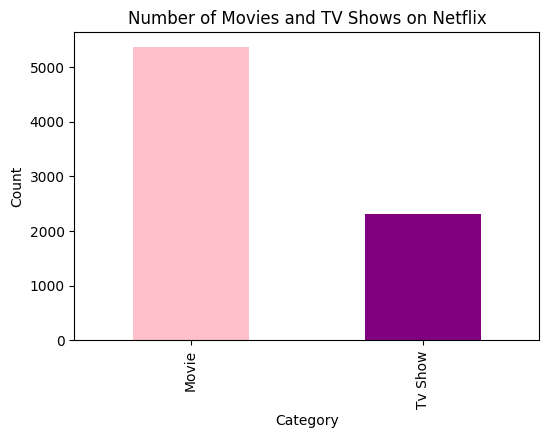

Category
Movie      5374
Tv Show    2310
dtype: int64


In [ ]:
# Count the number of titles in each Category (Movie or TV Show)
category_counts=netflix.groupby('Category').size()
# Bar chart
category_counts.plot(kind='bar', color=['pink', 'purple'], figsize=(6,4))

# Add title and labels
plt.title('Number of Movies and TV Shows on Netflix')
plt.xlabel('Category')
plt.ylabel('Count')

# Show the plot
plt.show()

print(category_counts)



In [57]:
# Select all Movies that were released in the year 2015

netflix.loc[(netflix['Release_Year']==2015) & (netflix['Category']=='Movie')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year,duration_num,duration_unit
128,s129,Movie,6 Years,Hannah Fidell,"Taissa Farmiga, Ben Rosenfield, Lindsay Burdge...",United States,2015-09-08,TV-MA,80 min,"Dramas, Independent Movies, Romantic Movies",As A Volatile Young Couple Who Have Been Toget...,2015,80,min
247,s248,Movie,A Very Murray Christmas,Sofia Coppola,"Bill Murray, Miley Cyrus, George Clooney, Chri...",United States,2015-12-04,TV-14,57 min,"Comedies, Music & Musicals",Bill Murray Rounds Up An All-Star Cast For An ...,2015,57,min
316,s317,Movie,Advantageous,Jennifer Phang,"Jacqueline Kim, James Urbaniak, Freya Adams, K...",United States,2015-06-23,TV-MA,92 min,"Dramas, Independent Movies, Sci-Fi & Fantasy",In Order To Keep Her Job At A Biomedical Engin...,2015,92,min
535,s536,Movie,Anjelah Johnson: Not Fancy,Jay Karas,Anjelah Johnson-Reyes,United States,2015-10-02,TV-14,64 min,Stand-Up Comedy,"The Actress, Comedian And Youtube Sensation Ri...",2015,64,min
551,s552,Movie,Anthony Jeselnik: Thoughts And Prayers,Adam Dubin,Anthony Jeselnik,United States,2015-10-16,TV-MA,59 min,Stand-Up Comedy,There'S No Subject Too Dark As The Comedian Sk...,2015,59,min
648,s649,Movie,Aziz Ansari Live At Madison Square Garden,Aziz Ansari,Aziz Ansari,United States,2015-03-06,TV-MA,58 min,Stand-Up Comedy,"Stand-Up Comedian And Tv Star Aziz Ansari (""Pa...",2015,58,min
785,s786,Movie,Beasts Of No Nation,Cary Joji Fukunaga,"Idris Elba, Abraham Attah, Kurt Egyiawan, Jude...",United States,2015-10-16,TV-MA,137 min,"Dramas, Independent Movies","When Civil War Tears His Family Apart, A Young...",2015,137,min
1013,s1014,Movie,Bob'S Broken Sleigh,Jay Surridge,"Cole Howard, Bruce Greenwood, Victor Garber, M...",Canada,2015-12-17,TV-G,47 min,Children & Family Movies,"An Overly Eager Elf Improves Santa'S Sleigh, B...",2015,47,min
1352,s1353,Movie,Chris D'Elia: Incorrigible,Bill D'Elia,Chris D'Elia,United States,2015-04-17,TV-MA,84 min,Stand-Up Comedy,Stand-Up Comedian Chris D'Elia Covers Everythi...,2015,84,min
1357,s1358,Movie,Chris Tucker Live,Phil Joanou,Chris Tucker,United States,2015-07-10,TV-MA,92 min,Stand-Up Comedy,"Filmed In His Hometown Of Atlanta, Chris Tucke...",2015,92,min


In [ ]:
# Get a list of all TV Show titles produced in India
tv_shows_india=netflix.loc[(netflix['Country']=='India') & (netflix['Category']=='Tv Show'),'Title'].to_list()

# Display the list of Indian TV Shows
print(tv_shows_india)


['21 Sarfarosh: Saragarhi 1897', '7 (Seven)', 'Agent Raghav', 'Akbar\xa0Birbal', 'Anjaan: Rural Myths', 'Anjaan: Special Crimes Unit', 'Bad Boy Billionaires: India', 'Badalte Rishton Ki Dastaan', 'Bard Of Blood', 'Betaal', 'Bh Se Bhade', 'Bhaag Beanie Bhaag', 'Bhaage Re Mann', 'Chhota Bheem', 'Chuchu Tv Nursery Rhymes & Kids Songs (Hindi)', 'Classic Legends', 'College Romance', 'Cricket Fever: Mumbai Indians', 'Darr Sabko Lagta Hai', 'Delhi Crime', 'Devlok With Devdutt Pattanaik', 'Dharmakshetra', 'Engineering Girls', 'Fabulous Lives Of Bollywood Wives', 'Fear Files... Har Mod Pe Darr', 'Gabru: Hip Hop Revolution', 'Gangs Of Hassepur', 'Ghoul', 'Girls Hostel', 'Hasmukh', 'Inmates', 'Jamtara - Sabka Number Ayega', 'Jhansi Ki Rani', 'Khan: No. 1 Crime Hunter', 'Khelti Hai Zindagi Aankh Micholi', 'Khotey Sikkey', 'Ladies Up', 'Leila', 'Little Singham', 'Little Things', 'Maharakshak Devi', 'Maharakshak: Aryan', 'Mahi Way', 'Masaba Masaba', 'Midnight Misadventures With Mallika Dua', 'Mighty

In [ ]:
# Count the total number of titles (Movies and TV Shows) for each Director
director_tv_movie=netflix.groupby('Director').size()
# Display the top 10 Directors with the most titles
director_tv_movie.sort_values(ascending=False).head(10)


Director
Unknown                   2292
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Youssef Chahine             12
Martin Scorsese             12
Jay Chapman                 12
Steven Spielberg            10
David Dhawan                 9
dtype: int64

In [46]:
netflix[(netflix['Category']=='Movie') & ((netflix['Type']=='Comedies') | (netflix['Country']=='United Kingdom'))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year
19,s20,Movie,'89,Unknown,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,2018-05-16,TV-PG,87 min,Sports Movies,"Mixing Old Footage With Interviews, This Is Th...",2018
33,s34,Movie,#Realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,TV-14,99 min,Comedies,When Nerdy High Schooler Dani Finally Attracts...,2017
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,2021-01-01,PG-13,102 min,Comedies,"Nearing A Midlife Crisis, Thirty-Something Mik...",2021
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,2018-12-20,TV-14,95 min,Sci-Fi & Fantasy,Working With An Artificial Intelligence To Inv...,2018
84,s85,Movie,21 & Over,"Jon Lucas, Scott Moore","Miles Teller, Skylar Astin, Justin Chon, Sarah...",United States,2019-04-16,R,93 min,Comedies,Jeff'S Straight-And-Narrow Life Changes Abrupt...,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
7634,s7633,Movie,Wine Country,Amy Poehler,"Amy Poehler, Maya Rudolph, Ana Gasteyer, Rache...",United States,2019-05-10,R,104 min,Comedies,When Longtime Friends Meet Up For A Wine-Soake...,2019
7649,s7648,Movie,Without Gorky,Cosima Spender,Unknown,United Kingdom,2017-05-31,TV-14,80 min,Documentaries,A Filmmaker Trains The Camera On Her Own Famil...,2017
7664,s7663,Movie,Work It,Laura Terruso,"Sabrina Carpenter, Jordan Fisher, Liza Koshy, ...",United States,2020-08-07,TV-14,94 min,Comedies,A Brilliant But Clumsy High School Senior Vows...,2020
7688,s7687,Movie,Xv: Beyond The Tryline,Pierre Deschamps,Unknown,United Kingdom,2020-03-18,TV-14,91 min,"Documentaries, Sports Movies","Set Against The 2015 Rugby World Cup, This Doc...",2020


In [ ]:
# Count the number of titles where 'Tom Cruise' appears in the Cast
netflix.loc[netflix['Cast'].str.contains('Tom Cruise', case=False, na=False)].shape[0]

2

In [ ]:
# Display all unique values in the 'Rating' column
netflix['Rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
# Count the number of Movies with a 'TV-14' rating that were produced in Canada
netflix.loc[(netflix['Category']=='Movie') & (netflix['Rating']=='TV-14') & netflix['Country']=='Canada'].shape[0]

0

In [ ]:
# Count the number of TV Shows that have a rating of 'R' and were released after 2018
tv_r_after2018_count = netflix.query(
    "Category == 'Tv Show' and Rating == 'R' and Release_Year > 2018"
).shape[0]
print(tv_r_after2018_count)

1


In [51]:
# Extract numbers and units
netflix['duration_num'] = netflix['Duration'].str.extract(r'(\d+)').astype(int)
netflix['duration_unit'] = netflix['Duration'].str.extract(r'([a-zA-Z]+)')


# Maximum duration for Movies (in minutes)
max_movie_duration = netflix.loc[
    (netflix['Category'] == 'Movie') & (netflix['duration_unit'] == 'mins'),
    'duration_num'
].max()

# Maximum number of seasons for TV Shows
max_tv_seasons = netflix.loc[
    (netflix['Category'] == 'Tv Show') & (netflix['duration_unit'] == 'Seasons'),
    'duration_num'
].max()

print(f"Longest Movie: {max_movie_duration} mins")
print(f"Most TV Show seasons: {max_tv_seasons}")


Longest Movie: nan mins
Most TV Show seasons: 16


In [ ]:
# Select rows that are either:
# - Movies with Type 'Dramas', or
# - TV Shows with Type 'Kids'

category_instance = netflix.query(
    "(Category == 'Movie' and Type == 'Dramas') or (Category == 'Tv Show' and Type == 'Kids')"
)

print(category_instance)

     Show_Id Category                       Title           Director  \
4         s5    Movie                          21     Robert Luketic   
7         s8    Movie                         187     Kevin Reynolds   
170     s171    Movie                A Family Man      Mark Williams   
232     s233    Movie  A Stoning In Fulham County      Larry Elikann   
295     s296    Movie          Across Grace Alley      Ralph Macchio   
...      ...      ...                         ...                ...   
7417   s7416    Movie                      Victor  Brandon Dickerson   
7422   s7421    Movie                     Villain   Philip Barantini   
7449   s7448    Movie                         Vs.           Ed Lilly   
7465   s7464    Movie                   Wakefield      Robin Swicord   
7480   s7479    Movie                   War Horse   Steven Spielberg   

                                                   Cast  \
4     Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
7     Samuel L. J

In [53]:
# Sort ascending
netflix_sorted = netflix.sort_values(by='Release_Year')

# Sort descending
netflix_sorted_desc = netflix.sort_values(by='Release_Year', ascending=False)

print(netflix_sorted)
print(netflix_sorted_desc)


     Show_Id Category                                        Title  \
7115   s7114    Movie                         To And From New York   
1765   s1766  Tv Show                              Dinner For Five   
3248   s3249    Movie                      Just Another Love Story   
5766   s5766    Movie                                     Splatter   
3840   s3841    Movie                  Mad Ron'S Prevues From Hell   
...      ...      ...                                          ...   
4269   s4270    Movie                                          Mud   
2493   s2494    Movie                                   Goodfellas   
692     s693    Movie                               Bad Grandpa .5   
3521   s3522    Movie                                       Lagaan   
4468   s4469  Tv Show  Night Stalker: The Hunt For A Serial Killer   

                  Director                                               Cast  \
7115  Sorin Dan Mihalcescu  Barbara King, Shaana Diya, John Krisiukenas, Y... 

In [ ]:
# Find the country that appears most frequently for TV Shows
top_country = netflix[netflix['Category']=='Tv Show']['Country'].value_counts().idxmax()
print(top_country)


United States


In [ ]:
# Save the cleaned Netflix dataset to a new CSV file without including the index
netflix.to_csv("netflix_cleaned.csv", index=False)